 A Neural Network based Time-Series model, inspired by Facebook Prophet and AR-Net, built on PyTorch
    Documentation: https://neuralprophet.com/html/index.html
            

In [100]:
!pip install neuralprophet

NOTE: pickle is included in standard python lib by default from Pyhon 3.x

In [101]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle # for saving to disk

In [102]:
DATASET = 'C:\\Users\\tanma\\Documents\\programming\\SampleDatasets\\seattleWeather_1948-2017.xlsx'

In [103]:
df=pd.read_excel(DATASET)
print(df.info)

<bound method DataFrame.info of             DATE  PRCP  TMAX  TMIN  RAIN
0     1948-01-01  0.47    51    42   1.0
1     1948-01-02  0.59    45    36   1.0
2     1948-01-03  0.42    45    35   1.0
3     1948-01-04  0.31    45    34   1.0
4     1948-01-05  0.17    45    32   1.0
...          ...   ...   ...   ...   ...
25546 2017-12-10  0.00    49    34   0.0
25547 2017-12-11  0.00    49    29   0.0
25548 2017-12-12  0.00    46    32   0.0
25549 2017-12-13  0.00    48    34   0.0
25550 2017-12-14  0.00    50    36   0.0

[25551 rows x 5 columns]>


Check what data types are each column...

In [104]:
df.dtypes

DATE    datetime64[ns]
PRCP           float64
TMAX             int64
TMIN             int64
RAIN           float64
dtype: object

We see DATE column is a datetime object which is exactly what we need. If it was a generic object, we would need to convert it
via 
df=pd.to_datetime(df['DATE'])

Neural Prophet only takes a datetime object type.

If we wanted to filter the entire dataset to a specific criterion, e.g. if we had multiple cities in the dataset and only wanted 
the Seattle info, we could do this (but in our cases, we only have Seattle in this dataset):
    seattledf=df[df['CITY']=='Seattle']
    
   

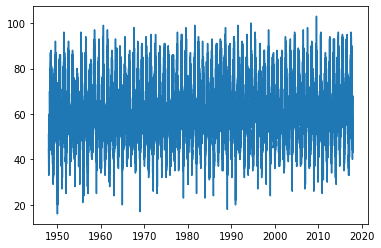

In [105]:
plt.plot(df['DATE'], df['TMAX']) # x axis: DATE; y axis=TMAX (max temp)

Optionally, we can grab a portion of dataset (e.g. for 30 years: 1987-2017) only for max temps. To do this we leverage
lambda() and extract year portion from the DATE col (since Year is NOT a separate col in the dataset) and then load into our
df dataframe where only year < 1986 (till the end).

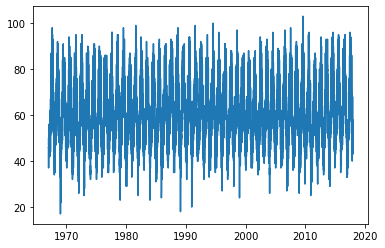

In [106]:
df['YR'] = df['DATE'].apply(lambda x: x.year) # grab only the year portion via lambda from DATE col.
# The above line also stores the extracted year in a new column called 'YR'
df = df[df['YR'] >=1967]
plt.plot(df['DATE'], df['TMAX'])
plt.show()
# Now we see the max temp data for 50 years To-date (2017).

In [107]:
df.head() # print the first 5 rows of our df and we see 'YR' as a new column...

,DATE,PRCP,TMAX,TMIN,RAIN,YR
6940,1967-01-01,0.00,46,36,0.0,1967
6941,1967-01-02,0.38,46,37,1.0,1967
6942,1967-01-03,0.14,46,41,1.0,1967
6943,1967-01-04,1.56,42,32,1.0,1967
6944,1967-01-05,0.00,37,32,0.0,1967


In [108]:
df.tail() # print the last 5 rows of our df and we see 'YR' as a new column...

,DATE,PRCP,TMAX,TMIN,RAIN,YR
25546,2017-12-10,0.0,49,34,0.0,2017
25547,2017-12-11,0.0,49,29,0.0,2017
25548,2017-12-12,0.0,46,32,0.0,2017
25549,2017-12-13,0.0,48,34,0.0,2017
25550,2017-12-14,0.0,50,36,0.0,2017


Neural Prophet ONLY supports 2 columns and 2 columns only! The first column is ds (for dates) and the second is 
y (value that we want to predict...e.g. MAXTEMP)

In [109]:
df2 = df[['DATE', 'TMAX']] # copy the two necessary cols from df to a new df2 dataframe
df2.dropna(inplace=True) # drop any missing rows of data from the df2 in place
df2.columns = ['ds', 'y'] # Now rename the two columns to ds and y as Prophet requires
df2.head() # print(df2.head())

WARNING - (py.warnings._showwarnmsg) - C:\Users\tanma\AppData\Local\Temp\ipykernel_908\302547975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True) # drop any missing rows of data from the df2 in place



,ds,y
6940,1967-01-01,46
6941,1967-01-02,46
6942,1967-01-03,46
6943,1967-01-04,42
6944,1967-01-05,37


In [110]:
#Next, we need to train the Neural Prophet model...
model = NeuralProphet() # create a model
model.fit(df2, freq='D') # train the model by fit()
# 'D' means use daily data from dataset as our data is daily in the dataset



INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 88


  0%|          | 0/156 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.32E-02, min: 3.09E+00


  0%|          | 0/156 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.32E-02, min: 2.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.12E-02
Epoch[88/88]: 100%|██████████| 88/88 [00:54<00:00,  1.63it/s, SmoothL1Loss=0.00502, MAE=5.1, RMSE=6.47, RegLoss=0] 


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.796217,79.095326,95.904835,0.0
1,0.242145,36.023666,44.845162,0.0
2,0.012243,7.672404,9.633498,0.0
3,0.005636,5.396200,6.867757,0.0
4,0.005518,5.341831,6.793627,0.0
...,...,...,...,...
83,0.005068,5.126747,6.508334,0.0
84,0.005051,5.120006,6.497101,0.0
85,0.005033,5.113404,6.489418,0.0
86,0.005024,5.110636,6.484238,0.0


MAE: Mean Absolute Error is 5.1 or 5.1 points of error (+/-).

In [119]:
# Next it's time to predict...

In [112]:
future = model.make_future_dataframe(df2, periods=180) 
# periods specifies how many periods we're predicting, e.g. n days since our freq='D' (daily)
# 180 periods == 6 months daily forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [113]:
forecast = model.predict(future)
forecast.head() # print the first 5 days or predicted temps

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-12-15,None,47.900372,NaN,62.851109,-14.978199,0.027464
1,2017-12-16,None,47.795742,NaN,62.852337,-15.062304,0.005711
2,2017-12-17,None,47.743828,NaN,62.853565,-15.136890,0.027155
3,2017-12-18,None,47.779846,NaN,62.854794,-15.201892,0.126947
4,2017-12-19,None,47.537636,NaN,62.856022,-15.257277,-0.061108


NOTE: yhat1 ("y-hat one") column contains the forecast temperatures!

In [114]:
forecast.tail() # print the last 5 days or predicted temps

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
175,2018-06-08,None,71.573181,NaN,63.066208,8.479513,0.027464
176,2018-06-09,None,71.706787,NaN,63.067440,8.633631,0.005711
177,2018-06-10,None,71.887070,NaN,63.068672,8.791238,0.027155
178,2018-06-11,None,72.149551,NaN,63.069901,8.952700,0.126947
179,2018-06-12,None,72.128357,NaN,63.071129,9.118334,-0.061108


To see only the ds (date) and yhat (predicted TMAX temp) columns, just filter the print() as below:

forecast[['ds', 'yhat1']] but don't do this before plotting or it may generate keyerror in plotting!

We can plot the forecast temp values (in y axis and dates in x axis)...

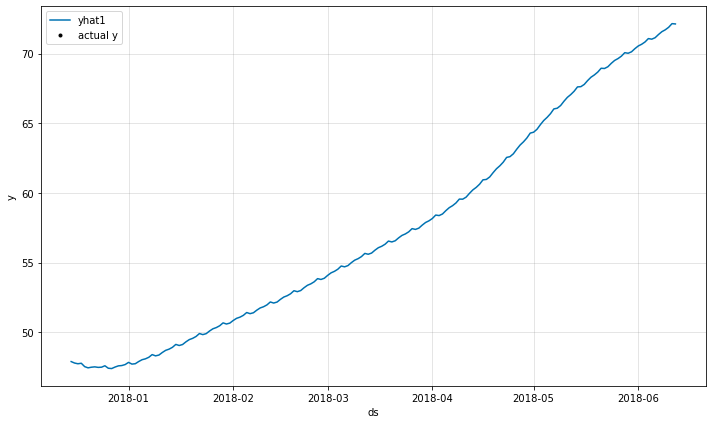

In [115]:
plot1 = model.plot(forecast)

The predicted data can also be shown like a visualization broken down by different components
such as overl trend, seasonality by year and week easily by:
    model.plot_components()

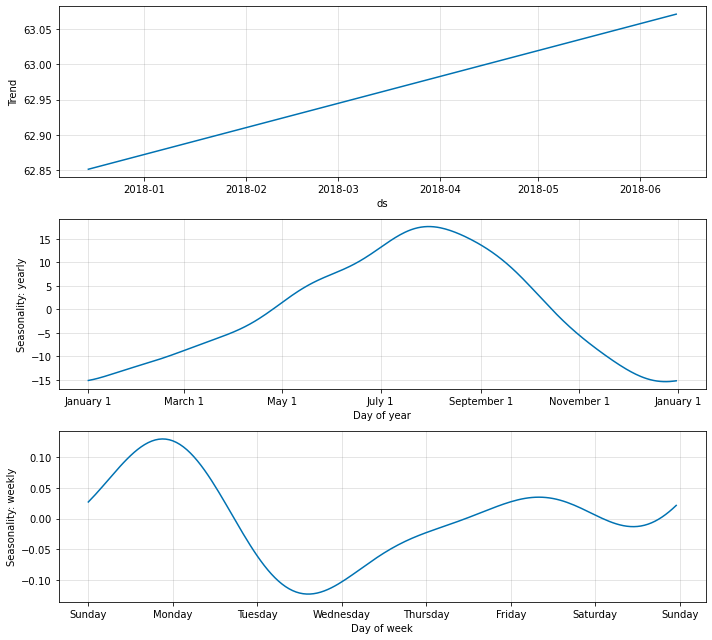

In [117]:
plot2 = model.plot_components(forecast)

NOTE: the y-axis in Trend chart shows the max temp, but in the Seasonality charts above y-axis is showing difference/fluctuations
    of temps.

OPTIONAL: To save this model to a file (persist), we use pickle library..

In [118]:
with open('WeatherPredictionNPSaved.pkl', "wb") as f:
          pickle.dump(model, f)
        
# The output binary file will be created and written as binary in the current directory of this notebook...
# To access it, File->Open (which opens http://localhost:8888/tree) and we'll see the WeatherPredictionNPSaved.pkl
# file there.

To load the model in the future, use the following snippet:

    with open('WeatherPredictionNPSaved.pkl', "rb") as f:
        model = pickle.load(f)

Then after loading a saved model, we can predict for another timeframe by running the following code block:
And change the periods for example:

future = model.make_future_dataframe(df2, periods=100) # 100 days ahead for example
forecast = model.predict(future)
forecast.head()

Then we can replot the new results by:
plot1 = model.plot(forecast)